In [2]:
import requests
import re
from pytrends.request import TrendReq
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time as tt

In [6]:
def set_proxy():
    response = requests.get("https://www.sslproxies.org/")
    proxy_ips = re.findall('\d+\.\d+\.\d+\.\d+:\d+', response.text)
    return proxy_ips

In [123]:
proxy_ips = set_proxy()

proxy_ips = ['https://'+_ for _ in proxy_ips]


In [ ]:
proxy_ips

In [146]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,35), retries=2, backoff_factor=0.1, requests_args={'verify':False})

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
mt2 = pd.read_csv("MeToo_excel_cleaned.csv")

In [13]:
mt2['name']

0        Cristiano Ronaldo
1            Ryan Seacrest
2      Neil deGrasse Tyson
3              Aziz Ansari
4             Sean Hannity
              ...         
180           Trent Franks
181          Andrea Ramsey
182       Andrew Creighton
183         Albert Schultz
184            Kevin Braun
Name: name, Length: 185, dtype: object

### Set relative topics

In [11]:
hashtag='#timesup, #metoostem, #sciencetoo, #metoophd, #shittymediamen, #churchtoo, #ustoo, #metooMVMT, #ARmetoo, #TimesUpAR, #metooSociology, #metooSexScience, #timesupAcademia, #metooMedicine, #MyCampusToo, #howiwillchange, #iwill, #believewomen, #GoTeal, #BelieveChristine, #IStandWithDrFord, #IStandWithChristineBlaseyFord, #believesurvivors, #whyididntreport, #himtoo, #istandwithbrett, #confirmkavanaguhnow, #metooMcdonalds, #metoomovement, #muteRKelly, #WeBelieveDrFord, #WeBelieveSurvivors, #HandsOffPantsOn, #MeAt14, #HeToo, #MeTooLiars, #metoolynchings, #metoohucksters, #metoohustle#ItWasMe, #IHave, #TimesUpTech, #GoogleWalkout, #mosquemetoo, #faithandmetoo, #SilenceIsNotSpiritual, #HealMeToo, #TimesUpHarvard, #NoCarveOut, #TimesUpx2, #MeetingsToo, #metoonatsec, #healmetoo, #GamAni, #ShulToo, #harvardhearsyou, #metooarcheology, #TimesUpPayUp, #metooarcheology, #metooHBCU, #TimesUpHC, #aidtoo, #garmentmetoo, #mutemetoo, #mutetimesup, #metoopolisci, #copstoo, #TimesUpBiden, #MeTooNoMatterWho, #IBelieveTara, and #BelieveAllWomen'
hashtag = hashtag.replace("#", '').replace(" ", '').split(",")

In [79]:
len(hashtag)

70

## Scratch Google Trends

In [15]:
all_data = [None] * len(mt2['name'])

In [152]:
def trending(all_data, nameList, timeFrame):
    for i in range(len(nameList['name'])//2):
        name = nameList['name'][2*i:2*i+2]
        print(f'Start {name} trending')
        pytrends.build_payload(nameList['name'][2*i:2*i+2],timeframe=timeFrame)
        timeTrends = pytrends.interest_over_time()
        all_data[i] = timeTrends
        sleepTime = np.random.uniform(5,10)
        print(f'sleeping {sleepTime} seconds to prevent shutdown')
        tt.sleep(sleepTime)

In [153]:
trending(all_data, mt2, '2017-10-01 2019-10-31')

Start 0    Cristiano Ronaldo
1        Ryan Seacrest
Name: name, dtype: object trending
sleeping 8.06817554828006 seconds to prevent shutdown


KeyboardInterrupt: 

In [59]:
nameL = ['Kevin Braun']
pytrends.build_payload(nameL,timeframe='2017-10-01 2019-10-31')

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [60]:
timeTrends = pytrends.interest_over_time()

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [37]:
nameTrend = all_data[0]

In [39]:
for i in range(len(all_data)):
    if i != 0:
        nameTrend = pd.concat([nameTrend, all_data[i]], axis=1)

In [65]:
nameTrend = nameTrend.drop(['isPartial'], axis=1)

In [51]:
nameTrend.loc[:,~nameTrend.columns.duplicated()].copy()

Cristiano Ronaldo  Ryan Seacrest  isPartial  Neil deGrasse Tyson  \
date                                                                           
2017-10-01                 12              1      False                    3   
2017-10-08                 12              1      False                    2   
2017-10-15                 11              1      False                    2   
2017-10-22                 17              1      False                    2   
2017-10-29                 12              1      False                    3   
...                       ...            ...        ...                  ...   
2019-09-29                  9              0      False                    1   
2019-10-06                  9              1      False                    3   
2019-10-13                 10              0      False                    2   
2019-10-20                  8              0      False                    2   
2019-10-27                  8              0      False                    1   

            Aziz Ansari  Sean Hannity  Russell Simmons  Kevin Spacey  \
date                                                                   
2017-10-01            1             8                3             0   
2017-10-08            1             8                2             0   
2017-10-15            1             8                2             0   
2017-10-22            1            11                2             0   
2017-10-29            2            13                2            36   
...                 ...           ...              ...           ...   
2019-09-29            1             6                1             0   
2019-10-06            1             5                1             0   
2019-10-13            1             5                1             0   
2019-10-20            1             4                2             0   
2019-10-27            1             4                1             0   

            Stan Lee  George Takei  ...  Cliff Hite  James Toback  \
date                                ...                             
2017-10-01         0             4  ...           0             0   
2017-10-08         0             5  ...           0             0   
2017-10-15         0             6  ...           1             1   
2017-10-22         0             5  ...           0           100   
2017-10-29         0             8  ...           0            22   
...              ...           ...  ...         ...           ...   
2019-09-29         1             4  ...           0             0   
2019-10-06         0             3  ...           0             0   
2019-10-13         0             3  ...           0             0   
2019-10-20         0             5  ...           0             0   
2019-10-27         0             3  ...           0             0   

            Knight Landesman  Murray Miller  Josh Zepnick  James Levine  \
date                                                                      
2017-10-01                 0              9             0             2   
2017-10-08                 0              6             0             3   
2017-10-15                 0              7             0             3   
2017-10-22                20              5             0             2   
2017-10-29                16              7             0             3   
...                      ...            ...           ...           ...   
2019-09-29                 0              5             0             1   
2019-10-06                 0              6             0             1   
2019-10-13                 0              6             0             2   
2019-10-20                 0              4             0             1   
2019-10-27                 0              5             0             1   

            Trent Franks  Andrea Ramsey  Andrew Creighton  Albert Schultz  
date                                                                       
2017-10-

In [1]:
list(nameTrend.columns)

NameError: name 'nameTrend' is not defined

In [67]:
nameTrend.to_csv("metoo2_googleTrends.csv")

In [72]:
trendSorted = nameTrend.sum(axis=0).sort_values(ascending=False)

In [73]:
trendSorted

Robert Moore          5118
Sam Adams             3941
Steven Seagal         3551
Ed Murray             3384
Chuck Close           3232
                      ... 
Lawrence M. Krauss       0
Benjamin Genocchio       0
David Marchant           0
Max Ogden                0
Charles Schwertner       0
Length: 185, dtype: int64

In [86]:
targets = []
for i in range(len(trendSorted)):
    if trendSorted[i] >= 1000:
        targets.append(trendSorted.index[i])

In [87]:
len(targets)

30

## Short Relative Topic

In [80]:
topics = ['metoo', 'sexual harassment', 'sexual', 'healmetoo', 'assault', 'rape', 'harassed', 'scandal']

In [163]:
def suspects_with_frequentWords_trending(targets, topics, lst):
    for name in targets:
        for topic in topics:
            searchingWord = [name + " + " + topic]
            print(f'Searching {searchingWord}')
            pytrends.build_payload(searchingWord, timeframe='2017-10-01 2019-10-31')
            time = pytrends.interest_over_time()
            lst.append(time)
            sleepTime = np.random.uniform(5,10)
            print(f'sleeping {sleepTime} seconds to prevent shutdown')
            tt.sleep(sleepTime)

In [164]:
all_data = []

In [ ]:
suspects_with_frequentWords_trending(targets, topics, all_data)

In [173]:
with open('metoo2_trendLargerThan1000.txt', 'w') as f:
    for item in targets:
        f.write("%s\n" % item)

In [167]:
nameWithKeyword = all_data[0]

In [168]:
for i in range(len(all_data)):
    if i != 0:
        nameWithKeyword = pd.concat([nameWithKeyword, all_data[i]], axis=1)

In [169]:
nameWithKeyword = nameWithKeyword.drop(['isPartial'], axis=1)

In [171]:
nameWithKeyword.to_csv("metoo2_withKeywords_googleTrends.csv")

<AxesSubplot:xlabel='date'>

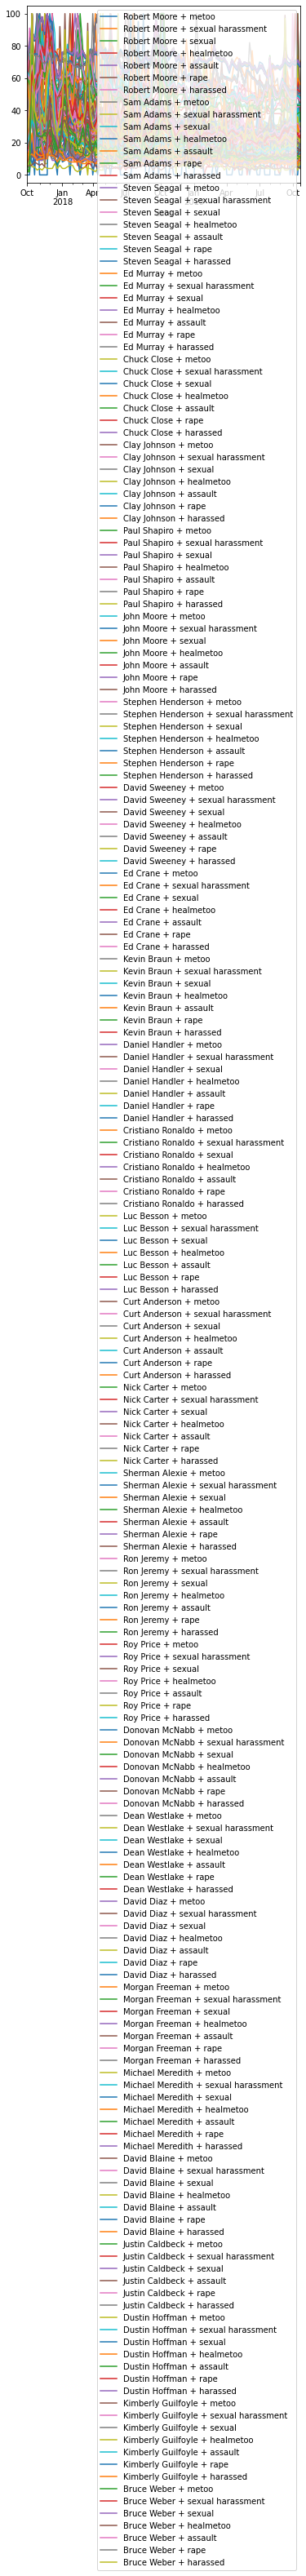